In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13226114,https://www.airbnb.com/rooms/13226114,20230624173239,2023-06-25,city scrape,Home in Seattle · ★4.79 · 2 bedrooms · 4 beds ...,"Explore Columbia City's lively culinary, bar ...",Columbia City's diverse restaurants and locall...,https://a0.muscache.com/pictures/miso/Hosting-...,1884549,...,5.00,4.61,4.65,STR-OPLI-19-000171,f,1,1,0,0,0.28
1,12518952,https://www.airbnb.com/rooms/12518952,20230624173239,2023-06-25,city scrape,Guest suite in Seattle · ★5.0 · 2 bedrooms · 6...,"Newly painted, beautiful, bright and wonderfu...","Many good restaurants and cafés, bathhouse the...",https://a0.muscache.com/pictures/9ff506f6-8927...,12677600,...,5.00,5.00,4.83,STR-OPLI-19-002061,f,1,1,0,0,0.71
2,521597880867717063,https://www.airbnb.com/rooms/521597880867717063,20230624173239,2023-06-24,city scrape,Serviced apartment in Seattle · Studio · 1 bath,Centrally located in the Adams neighborhood of...,NaN,https://a0.muscache.com/pictures/prohost-api/H...,48005494,...,5.00,3.50,5.00,NaN,f,36,36,0,0,0.44
3,17889172,https://www.airbnb.com/rooms/17889172,20230624173239,2023-06-24,city scrape,Rental unit in Seattle · ★5.0 · 1 bedroom · 1 ...,Mid-century apartment well preserved with rece...,Central Wallingford location. Close to Stone W...,https://a0.muscache.com/pictures/706ab66c-9cda...,66909032,...,5.00,4.96,4.89,STR-OPLI-19-000865,f,4,4,0,0,0.38
4,15917796,https://www.airbnb.com/rooms/15917796,20230624173239,2023-06-24,city scrape,Home in Seattle · ★4.60 · Studio · 3 beds · 1 ...,"The Carriage House is close to Eastlake Union,...",The neighborhood contains a mixture of residen...,https://a0.muscache.com/pictures/d56dc8ce-e594...,38021932,...,4.77,4.93,4.33,STR-OPLI-19-003016,f,1,1,0,0,0.38


In [25]:
# Count occurrences of each value and get the top 10
top_10_neighbourhoods = df_listings['neighbourhood_cleansed'].value_counts().head(10)

print(top_10_neighbourhoods)

Broadway               358
Belltown               334
Fremont                253
Wallingford            253
University District    246
Minor                  210
South Lake Union       189
North Beacon Hill      166
Greenwood              151
Green Lake             149
Name: neighbourhood_cleansed, dtype: int64


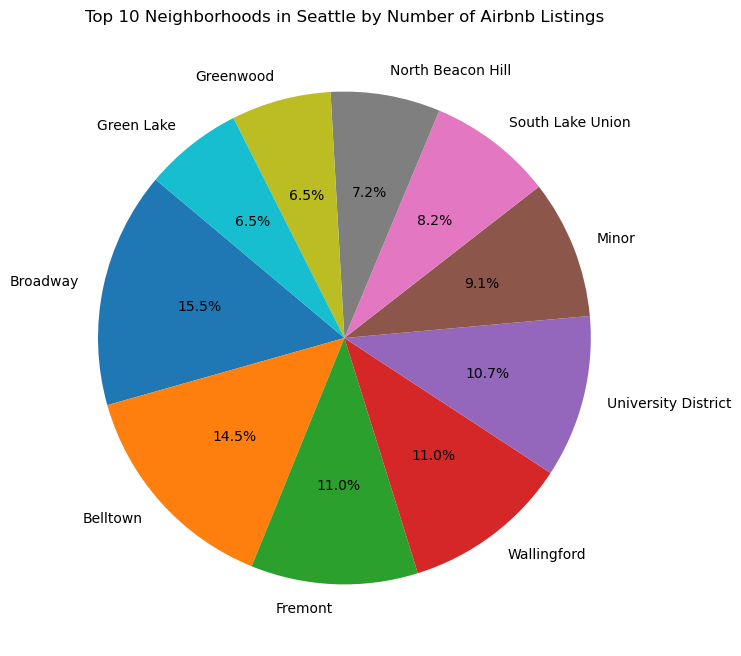

In [27]:
plt.figure(figsize=(8, 8))
plt.pie(top_10_neighbourhoods, labels=top_10_neighbourhoods.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Neighborhoods in Seattle by Number of Airbnb Listings')
plt.show()

In [28]:
# Count occurrences of each value and get the top 10
top_10_neighbourhood_group_cleansed = df_listings['neighbourhood_group_cleansed'].value_counts().head(10)

print(top_10_neighbourhood_group_cleansed)

Other neighborhoods    1368
Downtown                856
Capitol Hill            568
Central Area            568
Queen Anne              467
West Seattle            430
Ballard                 401
Rainier Valley          378
Cascade                 309
Beacon Hill             299
Name: neighbourhood_group_cleansed, dtype: int64


In [13]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            6636 non-null   int64  
 1   listing_url                                   6636 non-null   object 
 2   scrape_id                                     6636 non-null   int64  
 3   last_scraped                                  6636 non-null   object 
 4   source                                        6636 non-null   object 
 5   name                                          6636 non-null   object 
 6   description                                   6630 non-null   object 
 7   neighborhood_overview                         4859 non-null   object 
 8   picture_url                                   6636 non-null   object 
 9   host_id                                       6636 non-null   i

In [14]:
df_listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.636000e+03,6.636000e+03,6.636000e+03,6636.000000,6636.000000,6636.000000,6636.000000,6636.000000,0.0,5060.000000,...,5559.000000,5559.000000,5559.000000,5559.000000,5559.000000,6636.000000,6636.000000,6636.000000,6636.000000,5562.000000
mean,3.075627e+17,2.023062e+13,1.425390e+08,373.654159,472.590567,47.626700,-122.334122,4.009192,NaN,1.930435,...,4.807971,4.873056,4.864614,4.833412,4.710536,34.805304,33.127788,1.666365,0.011001,2.203218
std,3.715633e+17,2.773646e+00,1.592410e+08,1191.570899,1458.132668,0.049349,0.033042,2.552078,NaN,1.129622,...,0.348809,0.303903,0.350205,0.293526,0.391589,94.442932,94.616502,5.680614,0.182173,1.980246
min,6.606000e+03,2.023062e+13,2.536000e+03,1.000000,1.000000,47.495874,-122.419050,0.000000,NaN,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.684482e+07,2.023062e+13,1.726991e+07,1.000000,1.000000,47.601959,-122.356382,2.000000,NaN,1.000000,...,4.770000,4.880000,4.880000,4.800000,4.660000,1.000000,1.000000,0.000000,0.000000,0.610000
50%,5.168138e+07,2.023062e+13,7.841895e+07,3.000000,4.000000,47.623265,-122.333007,4.000000,NaN,2.000000,...,4.920000,4.960000,4.970000,4.910000,4.810000,2.000000,1.000000,0.000000,0.000000,1.710000
75%,7.065462e+17,2.023062e+13,2.293122e+08,19.000000,28.000000,47.664345,-122.311175,5.000000,NaN,2.000000,...,5.000000,5.000000,5.000000,4.980000,4.910000,14.000000,8.000000,0.000000,0.000000,3.240000
max,9.198184e+17,2.023062e+13,5.211079e+08,4751.000000,5646.000000,47.734010,-122.240870,16.000000,NaN,13.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,398.000000,398.000000,41.000000,4.000000,22.470000


In [15]:
# Remove unwanted columns

listings_clean = df_listings.drop(columns = ['listing_url', 'scrape_id', 'last_scraped', 'source', 'picture_url',
       'host_url', 'host_name', 'host_about', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'latitude',
       'longitude', 'bathrooms_text', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm'])

In [16]:
listings_clean.columns

Index(['id', 'name', 'description', 'neighborhood_overview', 'host_id',
       'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_listings_count', 'host_verifications', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'calendar_updated', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'first_review', 'last_review',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'instant_book

In [17]:
df_listings['host_id'].nunique()

3508

In [31]:
df_listings = df_listings.dropna(subset=['neighbourhood'])

In [35]:
neighborhood_counts = df_listings['neighbourhood'].value_counts()
print(neighborhood_counts)

Seattle, Washington, United States                     4846
Shoreline, Washington, United States                      6
West Seattle, Washington, Washington, United States       1
West Seattle, Washington, United States                   1
Ballard, Seattle, Washington, United States               1
Capitol Hill, Seattle, Washington, United States          1
Seattle, Wa, United States                                1
Ballard Seattle, Washington, United States                1
Lake Forest Park, Washington, United States               1
Name: neighbourhood, dtype: int64


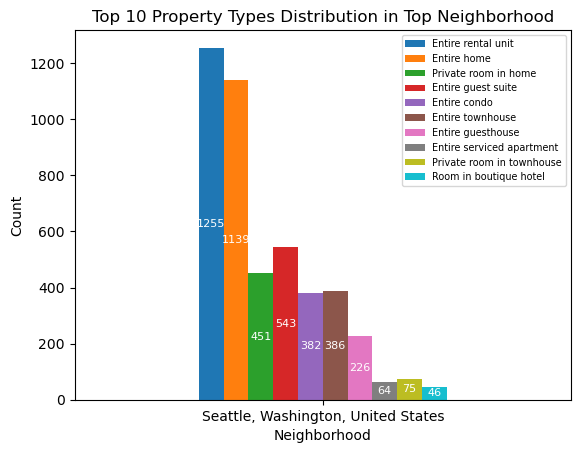

In [77]:
# Select the top neighborhood
top_neighborhood = neighborhood_counts.head(1).index

# Filter the DataFrame for the top neighborhood
df_top_neighborhood = df_listings[df_listings['neighbourhood'].isin(top_neighborhood)]

# Use groupby to group by neighborhood and property_type, then use value_counts
neighborhood_property_counts = df_top_neighborhood.groupby(['neighbourhood', 'property_type']).size().unstack(fill_value=0)

top10_property_types = df['property_type'].value_counts().head(10).index

# Filter the DataFrame for the top 10 property types
neighborhood_property_counts_top10 = neighborhood_property_counts[top10_property_types]

# Plotting the bar chart
ax = neighborhood_property_counts_top10.plot(kind='bar')

# Add labels on top of each bar for property_type values
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x + width/2, y + height/2, f'{height}', ha='center', va='center', fontsize=8, color='white')

plt.xticks(rotation=0)

plt.xlabel('Neighborhood')
plt.ylabel('Count')
plt.title('Top 10 Property Types Distribution in Top Neighborhood')

ax.legend(fontsize='x-small')

plt.show()

------------------------------------------------------------------------------------------

In [14]:
df_calendar = pd.read_csv('calendar.csv')
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2421778 entries, 0 to 2421777
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 129.3+ MB


In [15]:
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

In [16]:
# Convert 'price' column to string, remove dollar signs, and convert to numeric
df_calendar['price'] = pd.to_numeric(df_calendar['price'].astype(str).str.replace('$', '', regex=False), errors='coerce')

In [21]:
# Group by 'listing_id' and calculate the sum of 'price'
sum_prices_by_listing = df_calendar.groupby('listing_id')['price'].sum().reset_index()

print(sum_prices_by_listing.head(10))

   listing_id     price
0        6606   36160.0
1        9419   25621.0
2        9531   65345.0
3        9534   51385.0
4        9596   47450.0
5        9909   66777.0
6       11012  113252.0
7       25002   31755.0
8       68508   72105.0
9      116221   27375.0


In [23]:
df_calendar['listing_id'].nunique()

6635

-------------------------------------------------------------------------------------------------

In [24]:
df_reviews = pd.read_csv('reviews.csv')
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425070 entries, 0 to 425069
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     425070 non-null  int64 
 1   id             425070 non-null  int64 
 2   date           425070 non-null  object
 3   reviewer_id    425070 non-null  int64 
 4   reviewer_name  425070 non-null  object
 5   comments       425005 non-null  object
dtypes: int64(3), object(3)
memory usage: 19.5+ MB


In [25]:
df_reviews['date'] = pd.to_datetime(df_reviews['date'])

In [52]:
# Merge DataFrames on the 'id' column in df_listings and 'listing_id' column in df_reviews
merged_df = pd.merge(df_reviews, df_listings, left_on='listing_id', right_on='id', how='left')

In [54]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 425070 entries, 0 to 425069
Data columns (total 81 columns):
 #   Column                                        Non-Null Count   Dtype         
---  ------                                        --------------   -----         
 0   listing_id                                    425070 non-null  int64         
 1   id_x                                          425070 non-null  int64         
 2   date                                          425070 non-null  datetime64[ns]
 3   reviewer_id                                   425070 non-null  int64         
 4   reviewer_name                                 425070 non-null  object        
 5   comments                                      425005 non-null  object        
 6   id_y                                          367802 non-null  float64       
 7   listing_url                                   367802 non-null  object        
 8   scrape_id                                     367802 n

In [59]:
# Count the number of reviews per listing
reviews_per_listing = merged_df['listing_id'].value_counts()

# Display the property type with the most reviews
print("\nProperty Types with the Most Reviews:", most_reviews_property_type)

# Display the top 25 listings by the number of reviews
top_25_listings = reviews_per_listing.head(25)
print("\nTop 25 Listings by Number of Reviews:")
print(top_25_listings)


Top 25 Listings by Number of Reviews:
3861673     1281
25002        992
11398085     920
365550       814
7462250      782
14011625     774
12929985     756
3022564      741
3543247      738
9580021      721
21080282     716
10125020     708
19699462     707
2686374      700
10773776     688
8637174      675
9909445      659
17575412     638
15885497     638
2614387      635
4236723      629
14902204     625
7873789      618
5241773      618
20033536     613
Name: listing_id, dtype: int64


In [72]:
# Merge top_25_listings with df_listings to get 'property_type' for each listing
top_25_listings_with_property_type = pd.merge(df_listings, top_25_listings, left_on='id', right_index=True, how='inner')

# Sort the result by the number of reviews in descending order
top_25_listings_with_property_type = top_25_listings_with_property_type.sort_values(by='listing_id', ascending=False)

# Display the result
print("\nTop 25 Listings with Property Type:")
print(top_25_listings_with_property_type[['property_type', 'listing_id']])


Top 25 Listings with Property Type:
             property_type  listing_id
3578    Entire guest suite        1281
2981    Entire guest suite         992
529      Entire guesthouse         920
6181  Private room in loft         814
4899    Entire guest suite         782
6358     Entire guesthouse         774
1209    Entire rental unit         756
2533     Entire guesthouse         741
575     Entire rental unit         738
4479    Entire rental unit         721
432      Entire guesthouse         716
1446           Entire loft         708
1119    Entire guest suite         707
4150      Entire townhouse         700
5887  Private room in home         688
946     Entire rental unit         675
2228     Entire guesthouse         659
1242    Entire rental unit         638
1204    Entire rental unit         638
4103  Private room in home         635
6317      Entire townhouse         629
2960     Entire guesthouse         625
4501  Private room in home         618
2736    Entire guest suite 

In [73]:
def top_hosts(group):
    return group.nlargest(5, 'review_scores_rating')[['host_id', 'name', 'property_type', 'review_scores_value', 'review_scores_accuracy', 'reviews_per_month']]

top_hosts_by_property_type = listings_clean.groupby('property_type', group_keys=False).apply(top_hosts).reset_index(drop=True)

top_hosts_by_property_type

,host_id,name,property_type,review_scores_value,review_scores_accuracy,reviews_per_month
0,1037115,Boat in Seattle · 1 bedroom · 1 bed · 1.5 baths,Boat,5.00,5.00,0.02
1,161070422,Boat in Seattle · 2 bedrooms · 2 beds · 1 bath,Boat,4.50,5.00,0.51
2,525710,Boat in Seattle · ★5.0 · 1 bedroom · 1 bed · 1...,Boat,5.00,5.00,0.04
3,1037115,Boat in Seattle · ★4.93 · 1 bedroom · 1 bed · ...,Boat,4.82,4.93,0.56
4,158313246,Boat in Seattle · ★4.78 · 2 beds · 1 bath,Boat,4.44,4.89,0.21
...,...,...,...,...,...,...
180,94459,Tiny home in Seattle · 1 bed · 1 bath,Tiny home,5.00,5.00,0.08
181,238741480,Tiny home in Seattle · ★5.0 · 1 bedroom · 3 be...,Tiny home,4.93,4.99,4.47
182,25484821,Tiny home in Seattle · ★New · 1 bedroom · 1 be...,Tiny home,5.00,5.00,1.00
183,4123883,Tiny home in Seattle · ★4.98 · 1 bedroom · 1 b...,Tiny home,4.94,4.98,5.80
